In [26]:
from math import sqrt

import matplotlib.pyplot as plt
import radon
import torchvision
import torch

from lodopab_datamodule import LoDoPaBDataset

In [ ]:
def gen_elli_img() -> torch.Tensor:

In [6]:
img = gen elli_img()
plt.switch_backend("TkAgg")
plt.imshow(img[0])
plt.show()

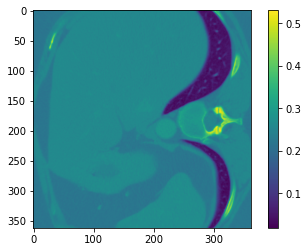

In [83]:
dataset = LoDoPaBDataset("/data/datasets/", LoDoPaBDataset.Subset.TEST, True, transform=torchvision.transforms.Resize((500,256)))
plt.imshow(dataset[0][1][0])
plt.colorbar()

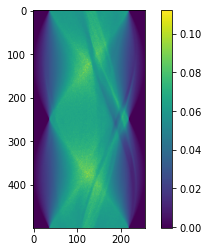

In [62]:
lsino = dataset[0][0]
filtered_lsino = radon.radon_filter(lsino.unsqueeze(0), radon.ram_lak_filter)
plt.imshow(lsino[0])
plt.colorbar()

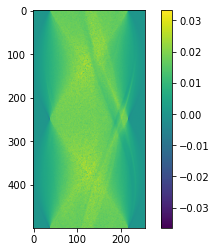

In [65]:
sino = radon.radon_forward(dataset[0][1].unsqueeze(0), torch.linspace(torch.pi*0.5, torch.pi*1.5, 501)[:-1].flip(-1), -torch.linspace(-362.0/sqrt(2.0), 362.0/sqrt(2.0), 256, dtype=torch.float))
filtered_sino = radon.radon_filter(sino, radon.ram_lak_filter)+0.03*torch.randn(sino)
plt.imshow(sino[0,0]/3-lsino[0])
plt.colorbar()

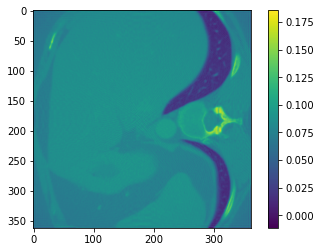

In [84]:
plt.imshow(radon.radon_backward(filtered_sino, 362, torch.linspace(torch.pi*0.5, torch.pi*1.5, 501)[:-1].flip(-1), -torch.linspace(-362.0/sqrt(2.0), 362.0/sqrt(2.0), 256, dtype=torch.float))[0,0])
plt.colorbar()

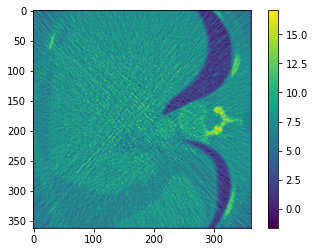

In [85]:
import torch_radon
torchradon = torch_radon.Radon(362, torch.linspace(torch.pi*0.5, torch.pi*1.5, 501)[:-1].flip(-1).to("cuda"), 256, 2)
plt.imshow(torchradon.backward(filtered_lsino.to("cuda")).to("cpu")[0,0].flip(-1))
plt.colorbar()